# ch4. pearson correlation

피어슨 상관계수는 두 변수 간의 선형적인 상관관계를 측정하는 지표입니다. 이를 이용하면 한 변수가 증가하거나 감소할 때, 다른 변수가 어떻게 변화하는지를 확인할 수 있습니다.

## 모집단과 표본
모집단(population): 관심이 되는 대상 전체 (전체 유권자들의 투표 성향)  
표본(sample): 모집단의 특성을 알기 위해 추출한 일부 (전화로 여론조사를 한 1000명의 투표 성향)  
모집단의 특성을 알기 위해서 모든 사람들을 다 조사할 수 없으니, 표본을 추출하여 조사한다. 모집단이 특정한 분포를 이루고 있다고 가정하고, 표본을 통해 추출한 정보로 모집단의 특징을 추측하는 것을 모수 통계라고 부릅니다.

## 평균과 분산
### 평균
자료의 합을 자료의 개수로 나눠준 값. 모집단의 평균인지, 표본 집단의 평균인지에 따라서 표기 방법만 살짝 다르다. 헷갈린다면 표본 평균, 표본 분산 정도만 이해하고 넘어가도 무방하다.

모평균: 그리스어로 M을 나타내는 μ(뮤) 문자를 사용. N은 모집단의 수  

$$\mu=\frac{\sum_{i=1}^{n}{x_{i}}}{N}$$

표본 평균: X위에 바를 그린 기호로 표현. n은 표본의 크기

$$\bar{X}=\frac{\sum_{i=1}^{n}{x_{i}}}{n}$$

예시)

| 광고비 | 5 | 6 | 7 | 8 | 9 | 11 | 12 | 13 | 14 | 15 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 매출액 | 16 | 19 | 18 | 20 | 24 | 26 | 30 | 32 | 31 | 34 |

In [1]:
import numpy as np

In [2]:
marketing_cost = np.array([5, 6, 7, 8, 9, 11, 12, 13, 14, 15])
sales = np.array([16, 19, 18, 20, 24, 26, 30, 32, 31, 34])

In [3]:
marketing_cost.mean()

10.0

In [4]:
sales.mean()

25.0

### 분산, 표준편차
자료가 평균을 기준으로 얼만큼 퍼져있는지를 측정한 값. 모든 자료들이 평균으로부터 얼만큼 떨어졌는지 거리를 제곱한 것을 평균낸 것이 분산. 분산을 제곱근 한 것이 표준 편차. 

모분산: 모표준편차의 제곱으로 표현됨. 각 자료 값들에서 모평균을 빼준 값의 제곱합을 다시 평균낸 값.

$$\sigma^2=\frac{\sum_{i=1}^{N}({x_{i}-\mu)^2}}{N}$$

모표준편차: 그리스어 문자료 s를 나타내는 σ를 기호로 사용. 모분산의 제곱근

$$\sigma=\sqrt{\sigma^2}$$

표본 분산: 표본 표준편차의 제곱으로 표현. 표본의 수 n이 아닌, n-1로 나눠주는데 이는 통계학에서 부르는 자유도(degree of freedom)이라는 개념이다. 완벽히 이해하려면 매우 복잡한 개념으로 일단은 암기하고, 직관적으로는 각 표본들에서 표본 평균을 한번씩 빼준걸 개수에 반영시켜 준다는 의미로 받아들이면 된다.
$$s^2=\frac{\sum_{i=1}^{n}({x_{i}-\bar{x})^2}}{n-1}$$

표본 표준 편차: s로 표현
$$s=\sqrt{s^2}$$

In [5]:
marketing_cost.var(ddof=1)

12.222222222222221

In [6]:
marketing_cost.std(ddof=1)

3.496029493900505

In [7]:
sales.var(ddof=1)

42.666666666666664

In [8]:
sales.std(ddof=1)

6.531972647421808

## 공분산과 상관계수
공분산은 한 확률 변수의 증감에 따른 다른 확률 변수의 증감의 경향에 대한 측도입니다. 이를 통해서 확률 변수들 간에 선형적인 상관관계를 알 수 있습니다. 공분산이 양수이면 한쪽이 증가하면 다른 한쪽도 증가하고, 음수이면 한쪽이 증가하면 다른 한 쪽은 감소합니다.

**모집단 공분산**

$$\sigma_{xy}=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})$$

**표본집단 공분산**

$$S_{xy}=\frac{1}{n-1}\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})$$

| 광고비 | 매출액 | 광고비 - 평균 광고비 | 매출액 - 평균 매출액 | (광고비 - 평균 광고비)*(매출액 - 평균 매출액) |
| --- | --- | --- | --- | --- |
| 5 | 16 | -5 | -9 | 45 |
| 6 | 19 | -4 | -6 | 24 |
| 7 | 18 | -3 | -7 | 21 |
| 8 | 20 | -2 | -5 | 10 |
| 9 | 24 | -1 | -1 | 1 |
| 11 | 26 | 1 | 1 | 1 |
| 12 | 30 | 2 | 5 | 10 |
| 13 | 32 | 3 | 7 | 21 |
| 14 | 31 | 4 | 6 | 24 |
| 15 | 34 | 5 | 9 | 45 |
| 100 | 250 | 0 | 0 | 202 |

$$S_{xy}=\frac{202}{10-1}=22.44(억원)$$

In [9]:
np.cov(marketing_cost, sales, ddof=1)

array([[12.22222222, 22.44444444],
       [22.44444444, 42.66666667]])

### 피어슨 상관 계수
두 숫자형 변수 사이 선형적 강도를 나타내기 위해 공분산을 각 변수의 표준 편차로 나눈 피어슨 상관계수를 사용한다.

모집단의 피어슨 상관계수

$$\rho_{XY}=\frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}}$$

표본집단의 피어슨 상관계수

$$r_{xy}=\frac{S_{xy}}{S_{x}S_{y}}$$

In [10]:
np.corrcoef(marketing_cost, sales)

array([[1.        , 0.98285492],
       [0.98285492, 1.        ]])

피어슨 상관계수를 통해서 알아본 마케팅 비용과 매출간의 상관관계는 0.86이다. 이는 마케팅 비가 증가하면 매출이 증가하는 뚜렷한 양의 선형적 상관관계가 있다고 볼 수 있다. 피어슨 상관계수에 따라서 자료의 분포 형태는 아래와 같은 모습을 보인다.

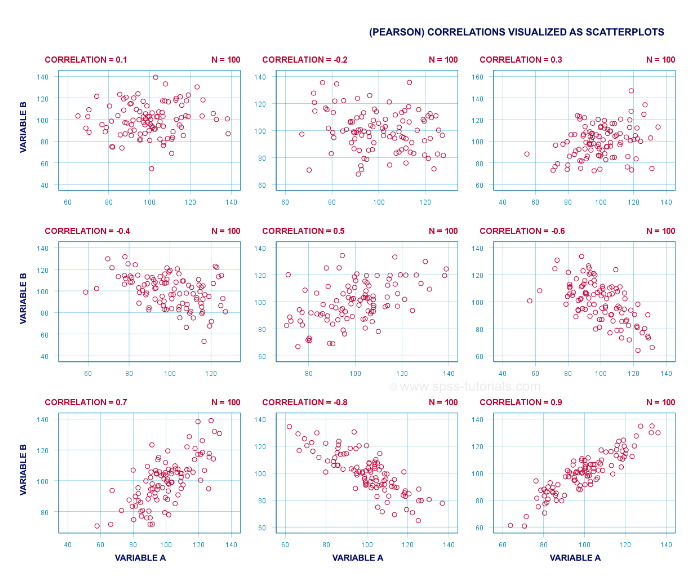

In [11]:
from matplotlib import pyplot as plt

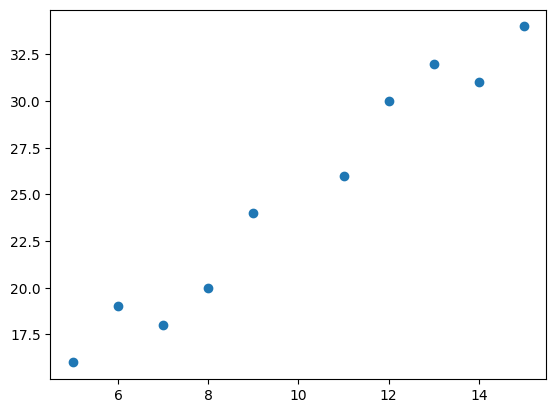

In [12]:
plt.scatter(marketing_cost, sales)

마케팅 비용과 매출액도 실제로 오른쪽 아래 그림과 비슷한 분포를 보이는지 산포도를 그려보겠습니다.

## pandas corr을 이용한 pearson coefficient 계산

이제 피어슨 상관계수가 무엇인지 알았으니, 우리가 전처리한 데이터 셋을 가지고 계산해보겠습니다. pandas dataframe의 corr 함수를 이용하면 모든 컬럼 쌍 간의 피어슨 상관계수를 계산해줍니다.

In [14]:
import pandas as pd

df = pd.read_csv("./data/preprocessed_train.csv")

In [15]:
droped_df = df.drop(["PassengerId"], axis=1)

In [18]:
droped_df

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,is_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.560331,0.125,0.000000,-0.898323,0.1,0,1,0,0,1
1,1,1,0.655107,0.125,0.000000,1.343689,0.1,0,0,1,0,0
2,1,3,-0.256471,0.000,0.000000,-0.817085,0.0,1,0,0,0,1
3,1,1,0.427212,0.125,0.000000,1.044367,0.1,0,0,0,0,1
4,0,3,0.427212,0.000,0.000000,-0.802717,0.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.180507,0.000,0.000000,-0.352025,0.0,1,1,0,0,1
887,1,1,-0.788225,0.000,0.000000,0.469141,0.0,1,0,0,0,1
888,0,3,-0.546252,0.125,0.222222,0.223950,0.3,0,0,0,0,1
889,1,1,-0.256471,0.000,0.000000,0.469141,0.0,1,1,1,0,0


## 피쳐 간의 상관관계 분석하기
pandas dataframe의 corr 함수를 이용하면 각 컬럼 간의 상관관계를 분석해줍니다. dataframe의 corr 함수는 기본적으로 모든 컬럼 쌍 간의 person 상관계수를 계산합니다.

원래는 범주형 데이터와 숫자형 데이터 사이의 피어슨 상관계수는 구할 수 없지만, 우리가 미리 one-hot encoding을 해주어 계산을 할 수 있습니다. 만일 one-hot encoding을 거치지 않고 바로 범주형 변수와 연속형 변수 사이의 상관관계를 계산하고 싶다면 다른 기법들도 있습니다만, 복잡하므로 생략하겠습니다. (simple is the best!)

In [19]:
droped_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,is_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.062011,-0.035322,0.081629,0.329862,0.016639,-0.203367,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.411177,0.083081,0.018443,-0.661022,0.065997,0.135207,0.131900,-0.243292,0.221009,0.074053
Age,-0.062011,-0.411177,1.000000,-0.249843,-0.179520,0.139265,-0.260444,0.179419,0.104977,0.043082,-0.084995,0.015746
SibSp,-0.035322,0.083081,-0.249843,1.000000,0.414838,0.318528,0.890712,-0.584471,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.179520,0.414838,1.000000,0.332186,0.783111,-0.583398,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.329862,-0.661022,0.139265,0.318528,0.332186,1.000000,0.383658,-0.478410,-0.263276,0.262341,-0.160456,-0.128846
FamilySize,0.016639,0.065997,-0.260444,0.890712,0.783111,0.383658,1.000000,-0.690922,-0.200988,-0.046215,-0.058592,0.077359
IsAlone,-0.203367,0.135207,0.179419,-0.584471,-0.583398,-0.478410,-0.690922,1.000000,0.303646,-0.095298,0.086464,0.029074
is_male,-0.543351,0.131900,0.104977,-0.114631,-0.245489,-0.263276,-0.200988,0.303646,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.043082,-0.059528,-0.011069,0.262341,-0.046215,-0.095298,-0.082853,1.000000,-0.148258,-0.782742


matplotlib과 seaborn을 사용하면 쉽게 시각화를 할 수 있습니다. 

<Axes: >

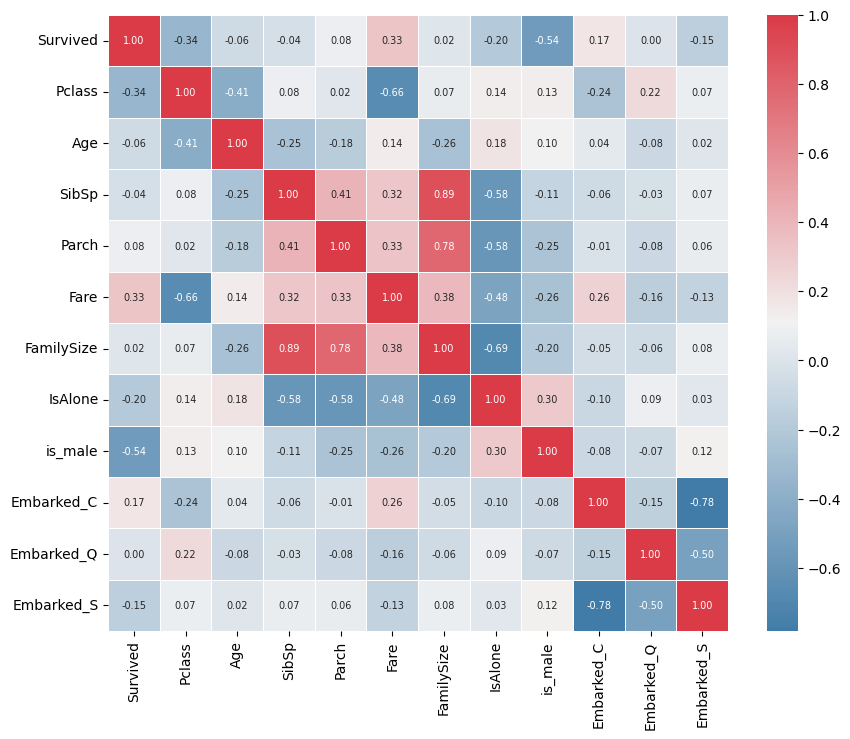

In [20]:
import seaborn as sns

cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(
    droped_df.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap=cmap, 
    linewidths=.5, 
    annot_kws={"size": 7}
)

붉은 색으로 표시된 부분은 양의 상관관계로 한 변수가 증가하면 다른 변수도 증가하는 것을 말합니다. 파란색으로 표시된 부분은 음의 상관관계로 하나가 증가하면 다른 하나는 감소하는 상관관계를 말합니다. 1이나 -1에 가까울 수록 강한 상관관계이고, 0에 가까울 수록 상관관계가 없습니다.

Survived 컬럼과 0.2 이상의 양의 상관관계를 갖는 컬럼은 Fare, Pclass_1이 있습니다. 이 말은 즉, 돈을 많이 지불할 수록, 1등석 승객일 수록 생존할 가능성이 높다는 것을 의미합니다. 다음으로 Survived 컬럼과 0.2 이상의 음의 상관관계를 갖는 컬럼은 is_male, IsAlone, Pclass 컬럼이 있습니다. 해석을 해보자면 여성일 수록 (is_male=0), 혼자 탈 수록 (IsAlone=0), 1등석에 탈수록 (Pclass_3=0) 생존율이 높다는 의미입니다. 흥미롭게도 Parch, SibSp 컬럼은 상관관계가 낮게 잡히는데 파생 변수로 추가한 IsAlone이 높은 상관관계를 보여줍니다.

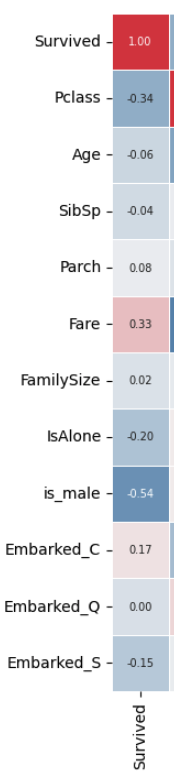

생존 여부와 관련 없는 다른 데이터들 간의 상관관계도 확인할 수 있습니다. 먼저 Pclass 컬럼은 Embarked_C와는 음의 상관관계, Embarked_Q와는 양의 상관관계를 갖습니다. 즉, C에서 탑승한 사람들은 주로 1등석에, Q에서 탑승한 승객들은 3등석에 탔다는걸 추론할 수 있습니다. 다음으로 Fare도 Embarked_C와 양의 상관관계에 있습니다. 즉, C에서 탄 사람들이 돈을 더 많이 지불하고 1등칸에 탔다는걸 알 수 있습니다.

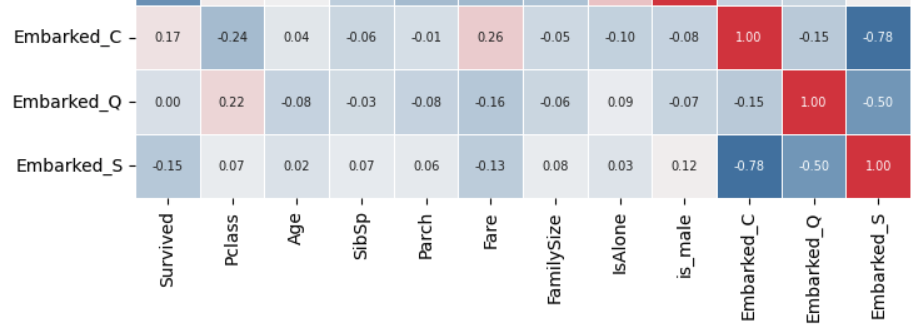

## 연습문제
상관관계 시각화 행렬을 보고, 앞서 언급되진 않았지만 흥미로운 상관관계들을 찾아보세요.